In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.special import gammaincc, gamma
import scipy.constants as const
import matplotlib.pyplot as plt

In [2]:
# Value
#kpc = 3.086e+19
kpc = 1

L = 50 * kpc

R_h = 11.41 * kpc
R_0 = 8.5 * kpc
rho_0 = 0.01992 * 1.9884e30 / (kpc)**3
n = 0.43

# Value of c
#c = 1
#c = 3e8
c = const.c

# Value of G
G = 1
#G = 4.30091e+3 * 3.086e+19/(1.9884e30)
#G = const.G

pi = np.pi

In [3]:
# Optical depth

def opt(I, l):
    k = G * I / (c**2 * l * 3.086e+19)
    return k

In [4]:
# Halo density formula
def rho(R):
    return rho_0 * np.exp(-(R/R_h)**(1/n))

# Halo Mass formula
def M(R):
    return 4 * n * pi * rho_0* R_h**3 * gamma(3 * n) * gammaincc(3 * n, (R/R_h)**(1/n))

# First integral v(x)
def u1(x):
    return x**2 / 2 - x * np.log(x) + x

#First inetgral value
def I1(a, b, l):
    return M(l * b) * u1(b) - M(l * a) * u1(a)

# M'(x)
def M_(x, l):
    return 4 * pi * l  *  rho(l * x) * x**2

def integrand(x, l):
    return M_(x, l) * u1(x)

In [5]:
l_value = np.arange(8.5, 50, 0.5)

int_val0 = []
int_val = []
Res1 = []
Res2 = []

for k in l_value:
    l = k * kpc
    res1 = I1(R_0/l, 1, l)
    res2, error = quad(integrand, R_0/l, 1, args=(l,))
    
    result = abs(res1 - res2)
    
    Res1.append(res1)
    Res2.append(res2)
    
    int_val0.append(result)
    val = opt(result, l)
    int_val.append(val)

Res1 = np.array(Res1)
Res2 = np.array(Res2)
    
int_val = np.array(int_val)
int_val0 = np.array(int_val0)

print(Res2)
print(Res1)
print(int_val)

[0.00000000e+00 2.01878738e+29 3.63021384e+29 4.91169506e+29
 5.92173691e+29 6.70572150e+29 7.29974316e+29 7.73319168e+29
 8.03051342e+29 8.21242313e+29 8.29674383e+29 8.29899235e+29
 8.23279025e+29 8.11015480e+29 7.94170819e+29 7.73683180e+29
 7.50378425e+29 7.24979642e+29 6.98115240e+29 6.70326256e+29
 6.42073232e+29 6.13742914e+29 5.85654859e+29 5.58067985e+29
 5.31187046e+29 5.05168963e+29 4.80128951e+29 4.56146363e+29
 4.33270180e+29 4.11524096e+29 3.90911152e+29 3.71417891e+29
 3.53018030e+29 3.35675647e+29 3.19347902e+29 3.03987321e+29
 2.89543675e+29 2.75965498e+29 2.63201273e+29 2.51200353e+29
 2.39913631e+29 2.29294018e+29 2.19296762e+29 2.09879628e+29
 2.01002983e+29 1.92629807e+29 1.84725635e+29 1.77258471e+29
 1.70198671e+29 1.63518805e+29 1.57193517e+29 1.51199380e+29
 1.45514752e+29 1.40119637e+29 1.34995556e+29 1.30125422e+29
 1.25493427e+29 1.21084933e+29 1.16886376e+29 1.12885178e+29
 1.09069662e+29 1.05428982e+29 1.01953050e+29 9.86324801e+28
 9.54585272e+28 9.242303

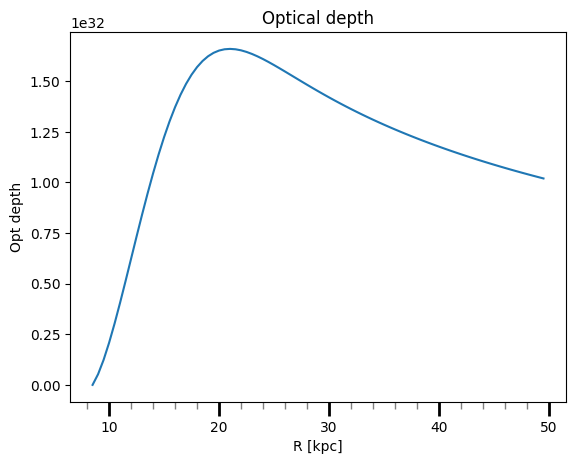

In [6]:
# Create the plot
fig, ax = plt.subplots()

# Plot the data
ax.plot(l_value, int_val0)

# Set major ticks locator and format
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Customize the ticks
ax.tick_params(axis='x', which='major', length=10, width=2)
ax.tick_params(axis='x', which='minor', length=5, width=1, color='gray')

# Set labels
ax.set_xlabel('R [kpc]')
ax.set_ylabel('Opt depth')
ax.set_title('Optical depth')

# Show the grid
ax.grid(False, which='both')

# Display the plot
plt.show()

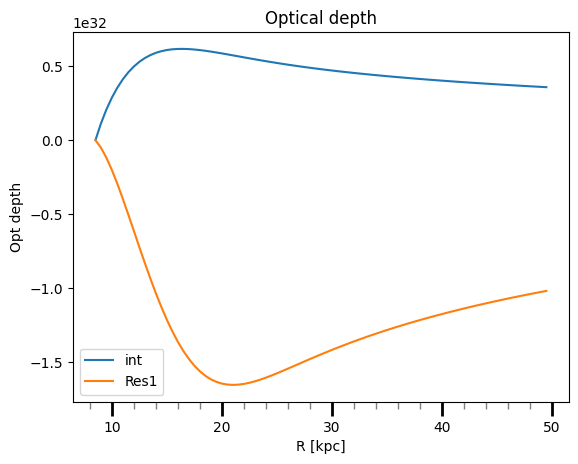

In [7]:
import numpy as np
from scipy.integrate import quad
from scipy.special import gammaincc, gamma
import scipy.constants as const
import matplotlib.pyplot as plt

# Value
kpc = 3.086e+19
#kpc = 1

L = 50 * kpc

R_h = 11.41 * kpc
R_0 = 8.5 * kpc
rho_0 = 0.01992 * 1.9884e30 / (kpc)**3
n = 0.43

# Value of c
#c = 1
#c = 3e8
c = const.c

# Value of G
#G = 1
#G = 4.30091e+3 * 3.086e+19/(1.9884e30)
G = const.G

pi = np.pi

# Opt depth
def opt(I, l):
    return G * I / (c**2 * l)

# Halo density formula
def rho(R):
    return rho_0 * np.exp(-(R/R_h)**(1/n))

# Halo Mass formula
def M(R):
    return 4 * n * pi * rho_0* R_h**3 * gamma(3 * n) * gammaincc(3 * n, (R/R_h)**(1/n))

# First integral v(x)
def u1(x):
    return x**2 / 2 - x * np.log(x) + x

#First inetgral value
def I1(a, b, l):
    return M(l * b) * u1(b) - M(l * a) * u1(a)

# M'(x)
def M_(x, l):
    return 4 * pi * l**3.32 * R_h**0.32 * gamma(3 * n) * x**2.32 *  rho(l * x)

def integrand(x, l):
    return M_(x, l) * u1(x)

def integrand1(x, l):
    return M(l * x) * (x - np.log(x))

l_value = np.arange(8.5, 50, 0.5)

int_val = []
int_val0 = []
int_val1 = []
Res1 = []
Res2 = []
tau = []

for k in l_value:
    l = k * kpc
    res1 = I1(R_0/l, 1, l)
    res2, error = quad(integrand, R_0/l, 1, args=(l,))
    
    result = abs(res1 - res2)

    res3, error1 = quad(integrand1, R_0/l, 1, args=(l,))

    res4 = abs(res3 - result)
    
    OPT = opt(res4, l)
    
    Res1.append(res1)
    Res2.append(res2)
    
    int_val0.append(result)
    int_val1.append(res3)
    int_val.append(res3)
    
    

Res1 = np.array(Res1)
Res2 = np.array(Res2)
    
int_val = np.array(int_val)
int_val0 = np.array(int_val0)
int_val1 = np.array(int_val1)
    
# Create the plot
fig, ax = plt.subplots()

# Plot the data
#ax.plot(l_value, int_val0, label='int by parts')
ax.plot(l_value, int_val, label='int')
ax.plot(l_value, Res1, label='Res1')
#ax.plot(l_value, Res2, label='Res2')

# Set major ticks locator and format
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Customize the ticks
ax.tick_params(axis='x', which='major', length=10, width=2)
ax.tick_params(axis='x', which='minor', length=5, width=1, color='gray')

# Set labels
ax.set_xlabel('R [kpc]')
ax.set_ylabel('Opt depth')
ax.set_title('Optical depth')

ax.legend()

# Show the grid
ax.grid(False, which='both')

# Display the plot
plt.show()


